# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>B168 Unsupervised Project </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membership card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. We will segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### Load Dataset

In the data set; There are customer ID numbers, gender, age, annual income, and spending score of the customer's expenses between 1-100. Those with low scores are customers who spend little, while those with high scores are customers who spend a lot. 

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [10]:
df.groupby("Gender")["Annual Income (k$)"].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [11]:
df.groupby("Gender")["Spending Score (1-100)"].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df = df.rename(columns = {"Annual Income (k$)": "Income",
               "Spending Score (1-100)": "Spending_score"})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_score'], dtype='object')

In [7]:
df["Gender"]=pd.get_dummies(df["Gender"], drop_first=True)
df.head()

,CustomerID,Gender,Age,Income,Spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df1=df.copy()

## Data Visualization

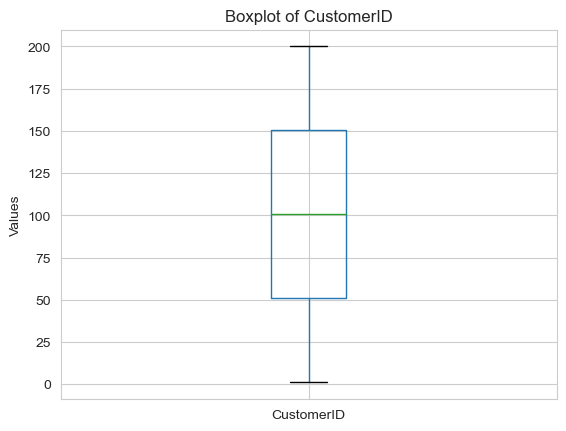

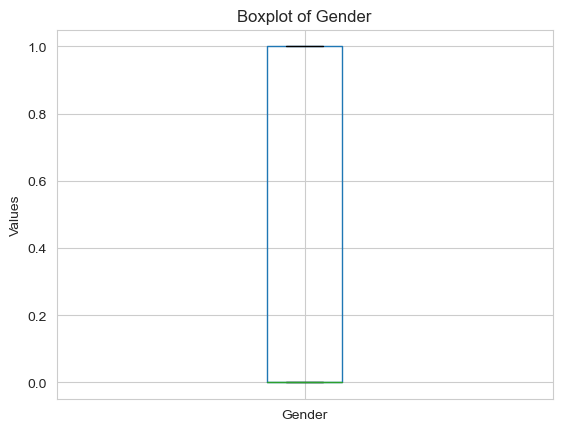

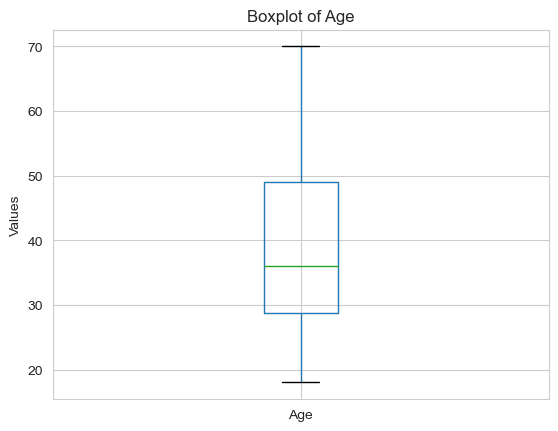

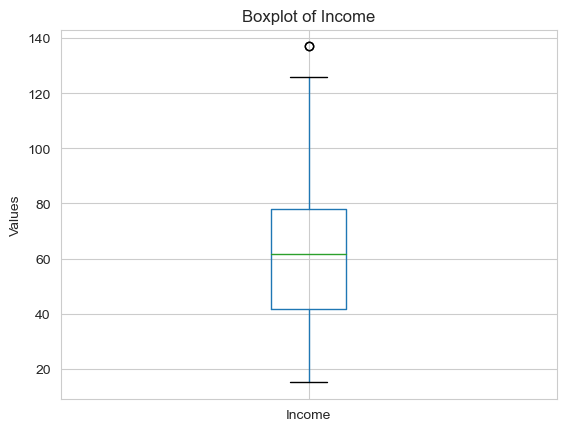

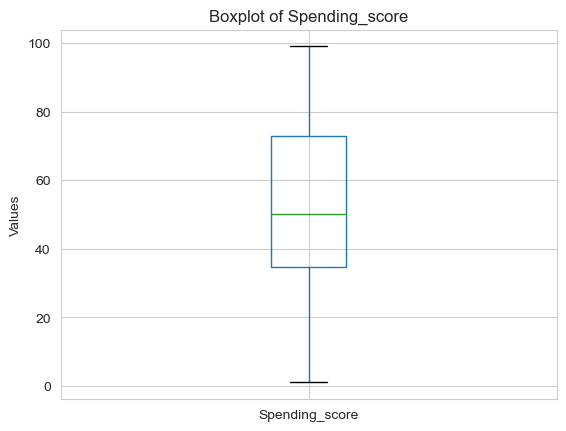

In [15]:
for column in df.columns:
    df.boxplot(column)
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Values")
    plt.show()

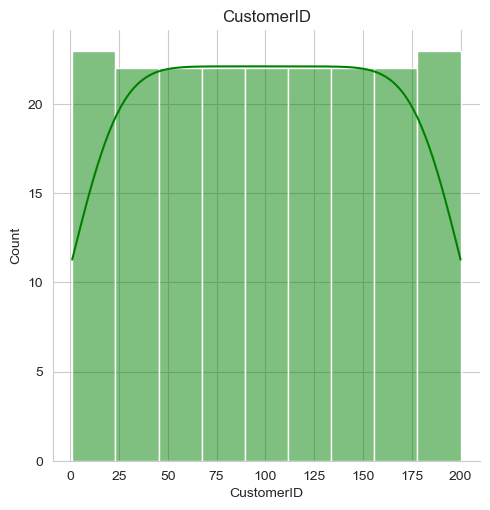

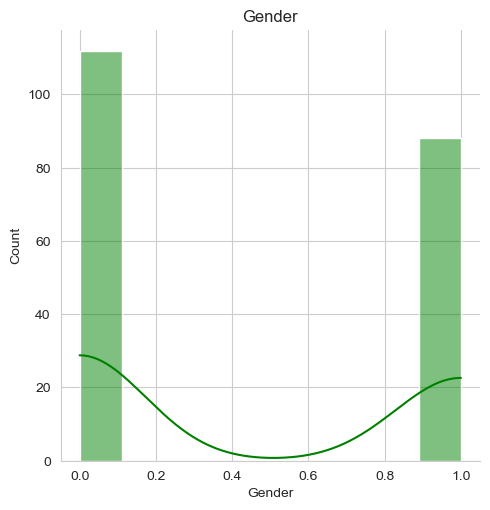

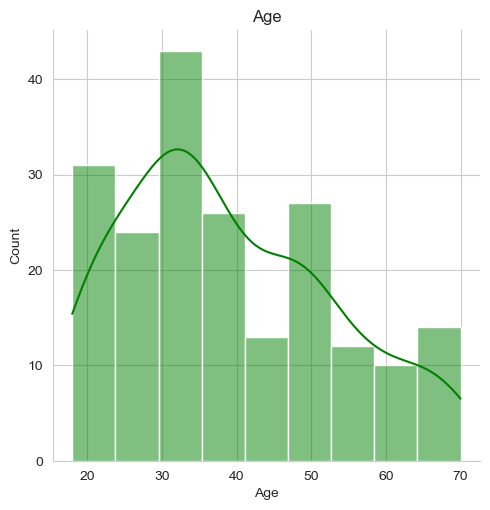

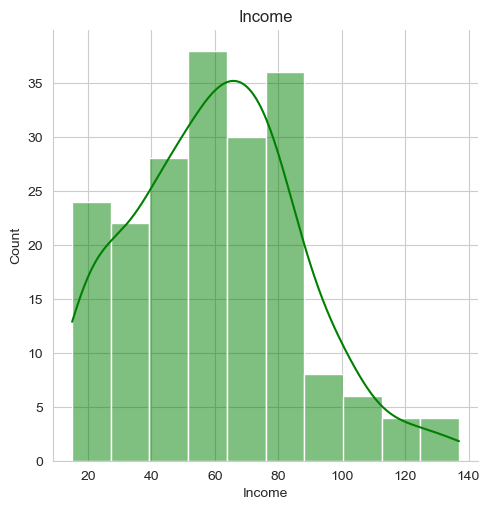

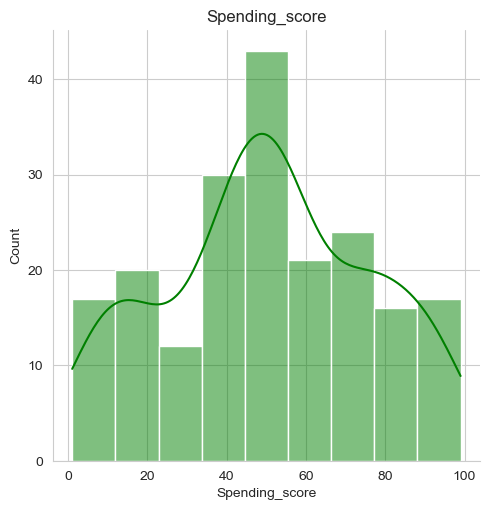

In [16]:
for column in df.columns:
    sns.displot(data=df, x=column,color="green", kde=True)
    plt.title(column)
plt.show()

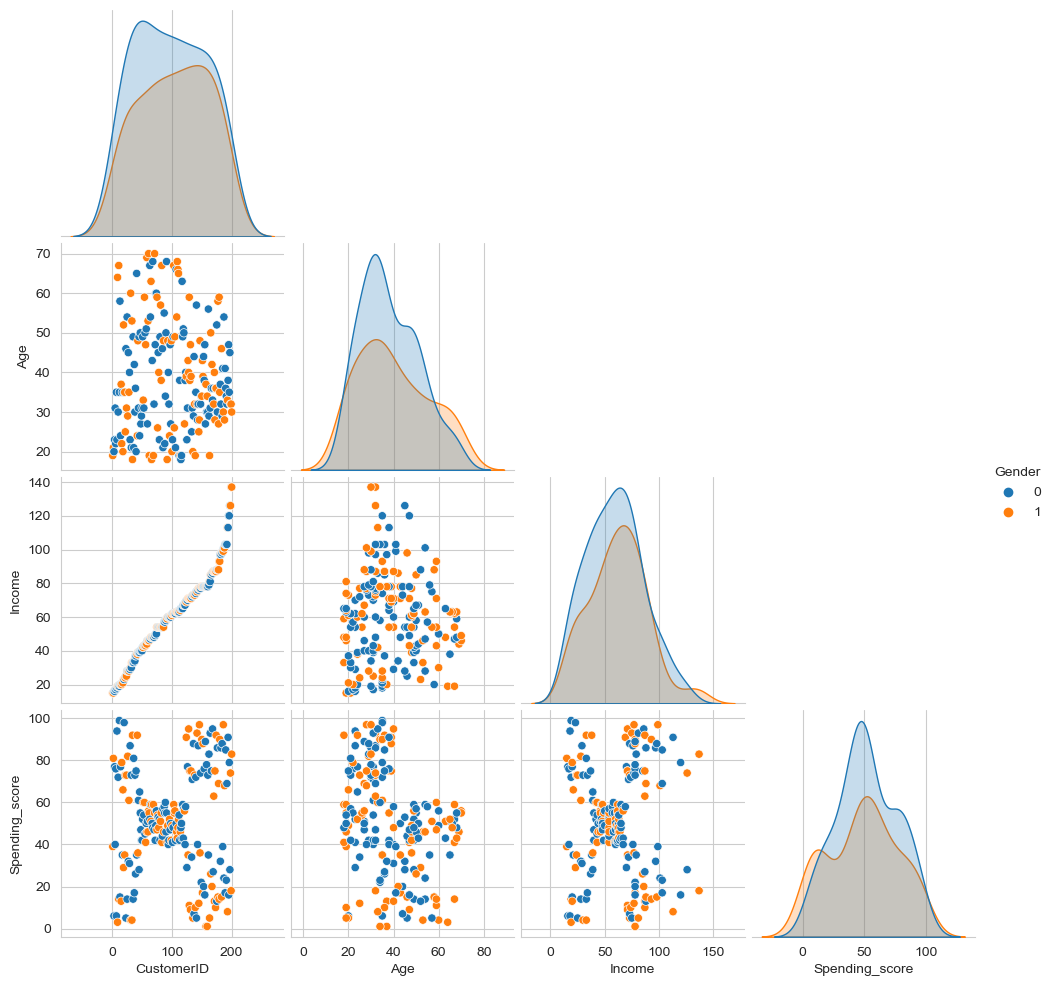

In [17]:
sns.pairplot(df, hue="Gender", corner=True);

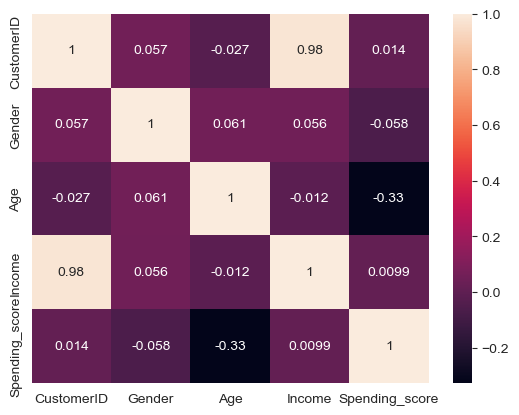

In [18]:
sns.heatmap(df.corr(), annot=True);

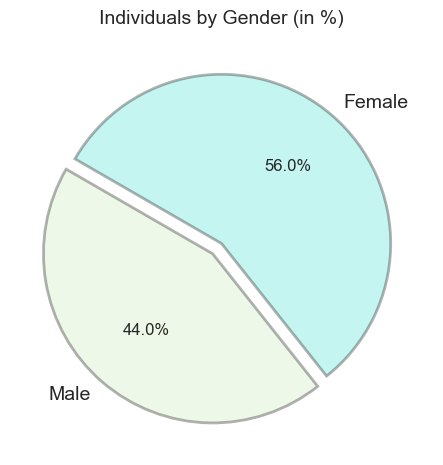

In [19]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df1['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

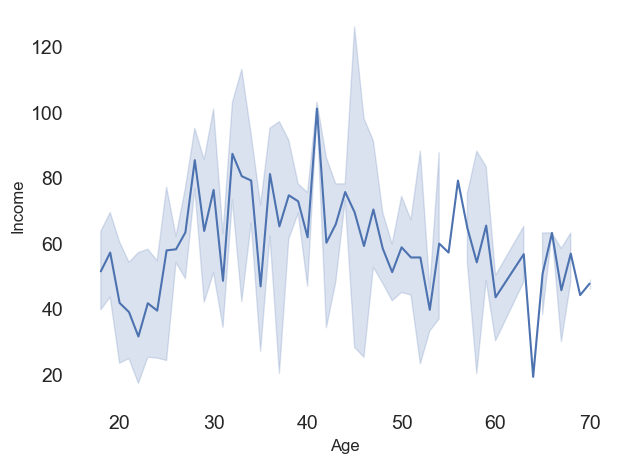

In [20]:
sns.lineplot(x=df["Age"], y=df["Income"]);

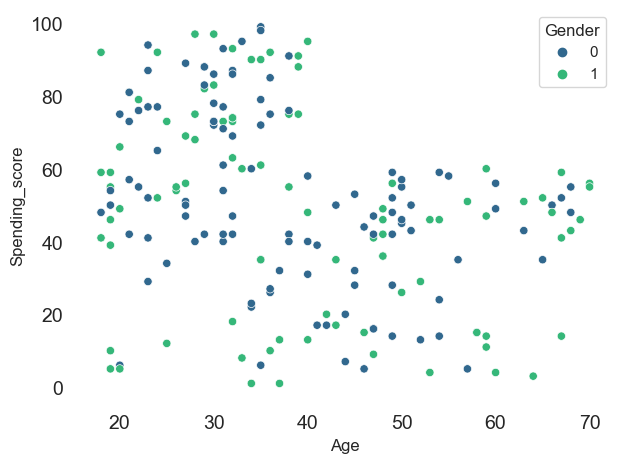

In [21]:
sns.scatterplot(x=df["Age"], y=df["Spending_score"], hue=df.Gender, palette="viridis");

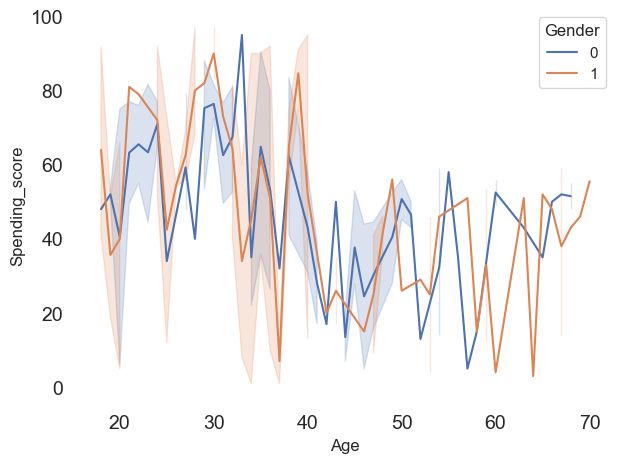

In [22]:
sns.lineplot(x=df["Age"], y=df["Spending_score"], hue=df.Gender);

I am dropping the CustomerID column because I think it may not contribute to the model.

In [9]:
df = df.drop(columns="CustomerID", axis="columns")
df.head(2)

,Gender,Age,Income,Spending_score
0,1,19,15,39
1,1,21,15,81


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

df_scaled = scaler.fit_transform(df) 

In [11]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head(2)

,Gender,Age,Income,Spending_score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704


In [12]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42,)


In [13]:
K_means_model.fit_predict(X)

array([1, 1, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 0, 3, 2, 2, 2, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 3, 1, 3, 1, 4, 1,
       0, 0, 4, 0, 4, 1, 4, 0, 4, 1, 0, 0, 4, 1, 3, 0, 4, 1, 4, 1, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 4, 1, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 1], dtype=int32)

In [14]:
X["Classes"] = K_means_model.labels_  
X.head(2)

,Gender,Age,Income,Spending_score,Classes
0,1.128152,-1.424569,-1.738999,-0.434801,1
1,1.128152,-1.281035,-1.738999,1.195704,1


In [15]:
X = X.drop("Classes", axis =1)
X.shape

(200, 4)

In [16]:
# Hopkins score calculation
from sklearn.neighbors import BallTree  
# BallTree is a data structure used to quickly perform distance queries between data points.

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [22]:
hopkins(X, X.shape[0])

0.25870377808134826

hopkins score < 0.3 this means that the data is suitable for clustering

## Choosing The Optimal Number of Clusters

In [23]:
ssd = []    # inertia: Sum of Squared Distances 

K = range(2,10)   

for k in K:                                        
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

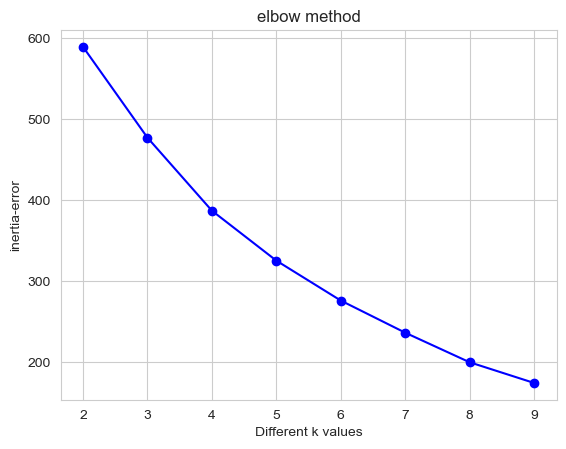

In [24]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [25]:
ssd

[588.8026767824937,
 476.78755441351586,
 386.71478577406873,
 325.1099834895344,
 275.8588431130499,
 236.2049470708688,
 199.7166255966767,
 174.1930957085769]

In [26]:
pd.Series(ssd).diff()

0           NaN
1   -112.015122
2    -90.072769
3    -61.604802
4    -49.251140
5    -39.653896
6    -36.488321
7    -25.523530
dtype: float64

In [27]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,112.015122
3,90.072769
4,61.604802
5,49.251140
6,39.653896
7,36.488321
8,25.523530


In [37]:
df_diff.diff()

,0
1,NaN
2,NaN
3,-21.942354
4,-28.467966
5,-12.353662
6,-9.597244
7,-3.165575
8,-10.964792


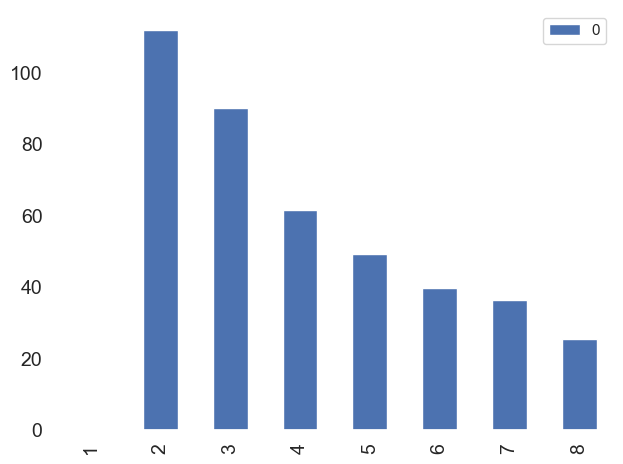

In [38]:
df_diff.plot(kind='bar');

max decrease appears in 4 however KElbowVisualizer chose 5 as optimum n_cluster.

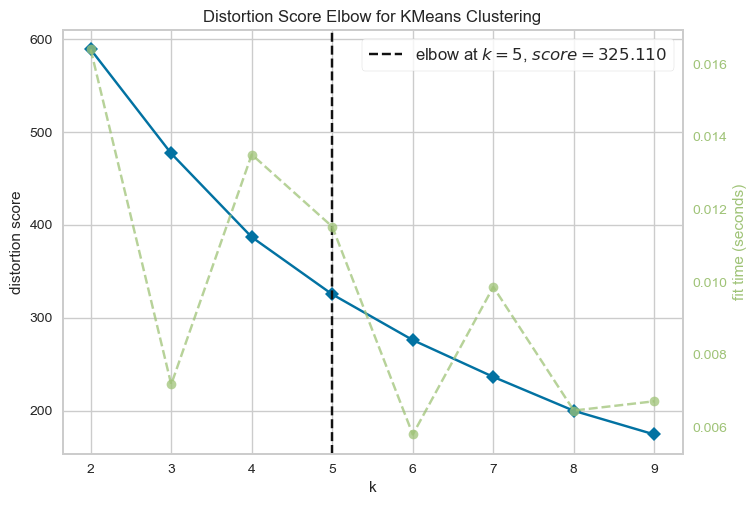

In [29]:
from yellowbrick.cluster import KElbowVisualizer  

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X)        
visualizer.show();

## Silhouette analysis

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
# silhouette score for n_cluster=5 K-means model
silhouette_score(X, K_means_model.labels_) 

0.31709067955763137

In [32]:
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.25181529157884364
For n_clusters=3, the silhouette score is 0.25951265087431563
For n_clusters=4, the silhouette score is 0.3016237438985174
For n_clusters=5, the silhouette score is 0.31709067955763137
For n_clusters=6, the silhouette score is 0.3336281031933481
For n_clusters=7, the silhouette score is 0.3573771582429211
For n_clusters=8, the silhouette score is 0.3873969164416463
For n_clusters=9, the silhouette score is 0.4022520246824372
For n_clusters=10, the silhouette score is 0.420342376994601
For n_clusters=11, the silhouette score is 0.4273168801169479
For n_clusters=12, the silhouette score is 0.42542960188176976
For n_clusters=13, the silhouette score is 0.42761474896919277
For n_clusters=14, the silhouette score is 0.4295952830224114


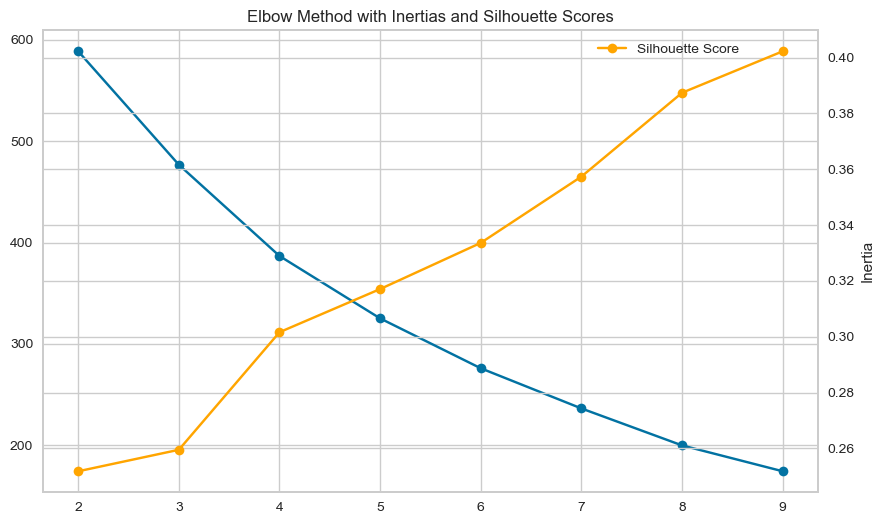

In [34]:
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

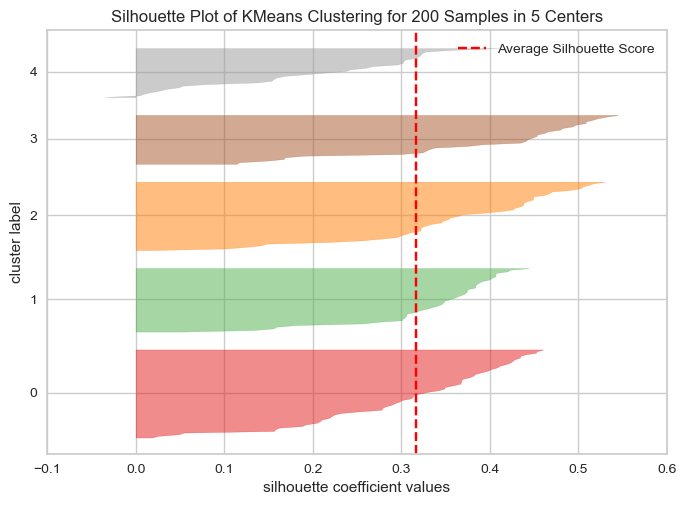

In [35]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)  
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();

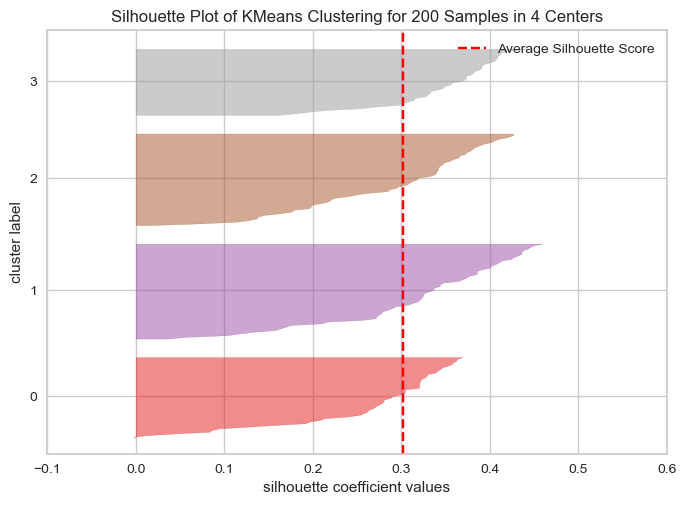

In [36]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)  
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();

### Without scaling

In [37]:

X2 = df1.copy()

In [38]:
X_not_scale = X2.copy()

In [39]:
hopkins(X2, X2.shape[0])

0.17502640985478823

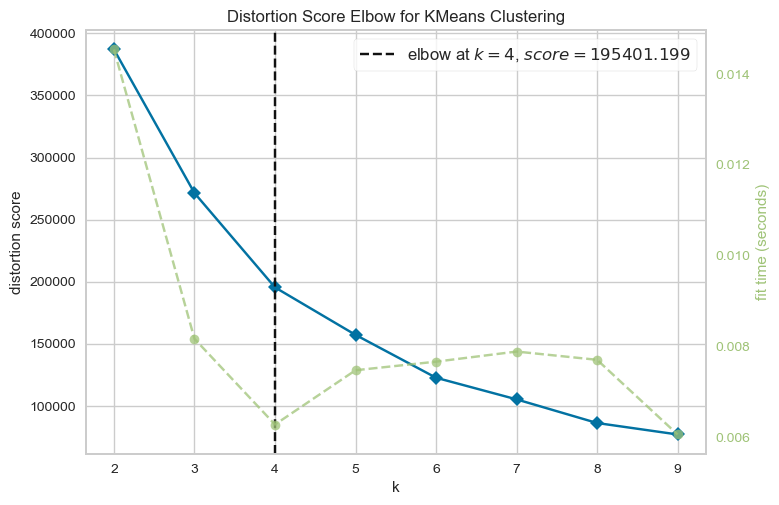

In [40]:
from yellowbrick.cluster import KElbowVisualizer  

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X2)        
visualizer.show();

In [41]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4793049017423563
For n_clusters=3, the silhouette score is 0.3766801400675223
For n_clusters=4, the silhouette score is 0.42245261332521894
For n_clusters=5, the silhouette score is 0.42309497779166094
For n_clusters=6, the silhouette score is 0.409528091044574
For n_clusters=7, the silhouette score is 0.40377132272288846
For n_clusters=8, the silhouette score is 0.40572559890744303


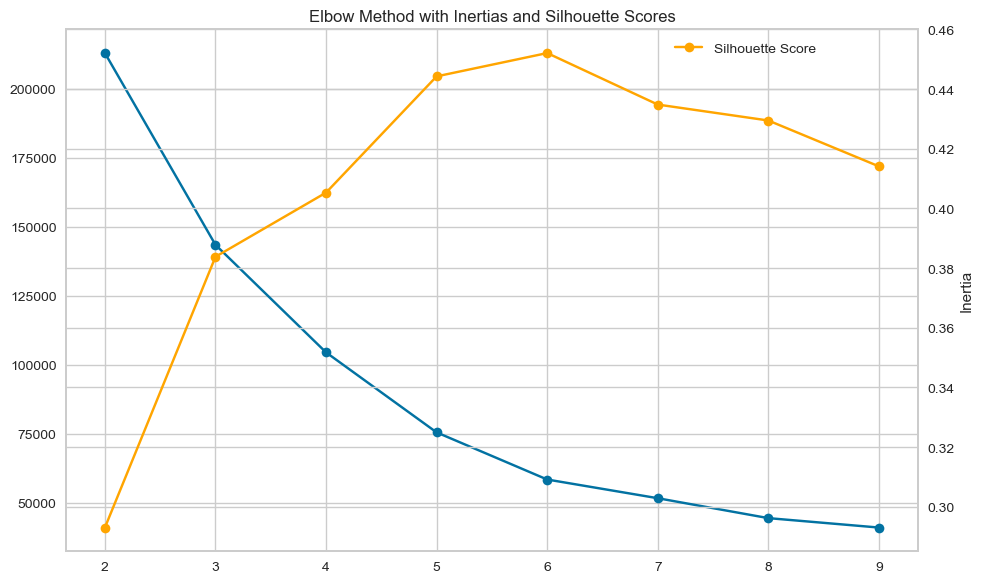

In [51]:
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X2)
    silhouette = silhouette_score(X2, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [52]:
X1 = df[["Age","Spending_score"]]
X1.head(2)

,Age,Spending_score
0,19,39
1,21,81


In [53]:
hopkins(X1, X1.shape[0])

0.28708697881112705

#### *ii. Determine optimal number of clusters*

In [54]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


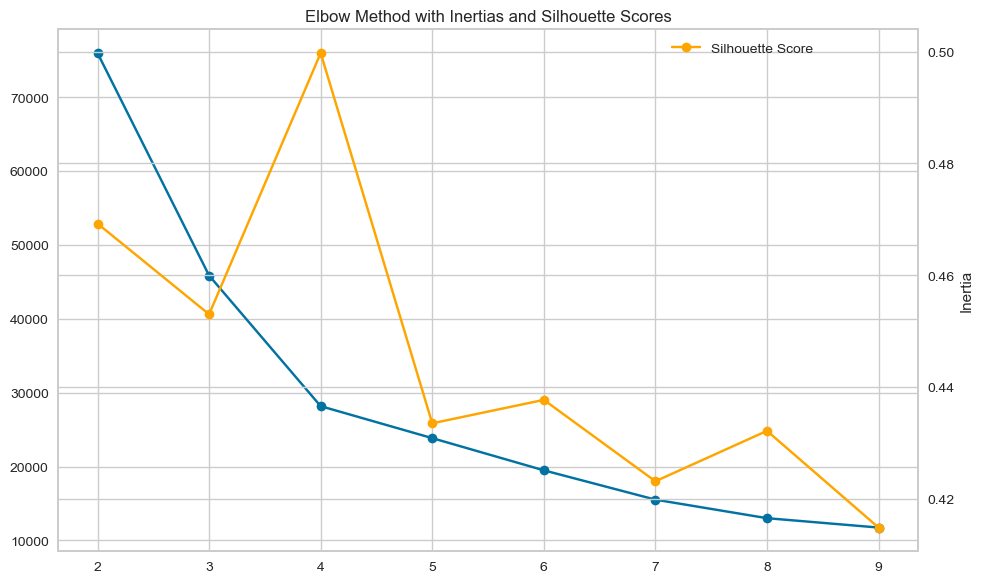

In [55]:
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X1)
    silhouette = silhouette_score(X1, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

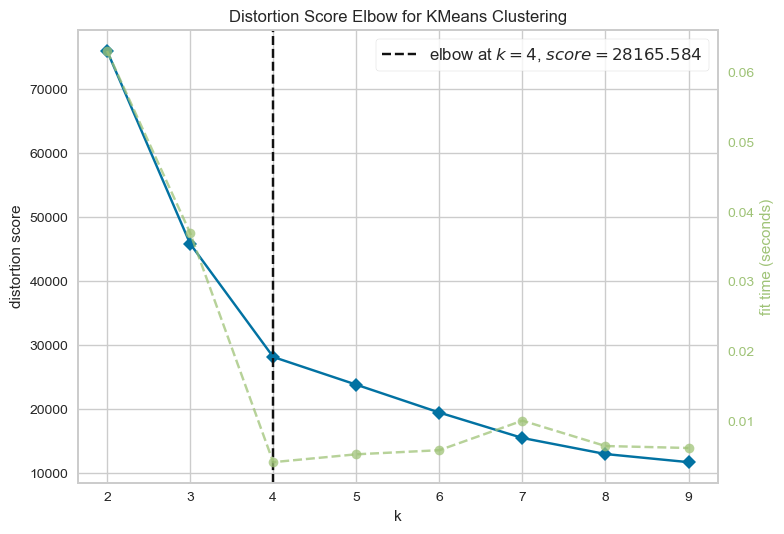

In [56]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X1)        
visualizer.show();

4 is optimal cluster number

### Why silhouette_score is negative?

A negative silhouette score indicates that the data point is closer to another cluster than to its own cluster, and may be better off assigned to a different cluster.

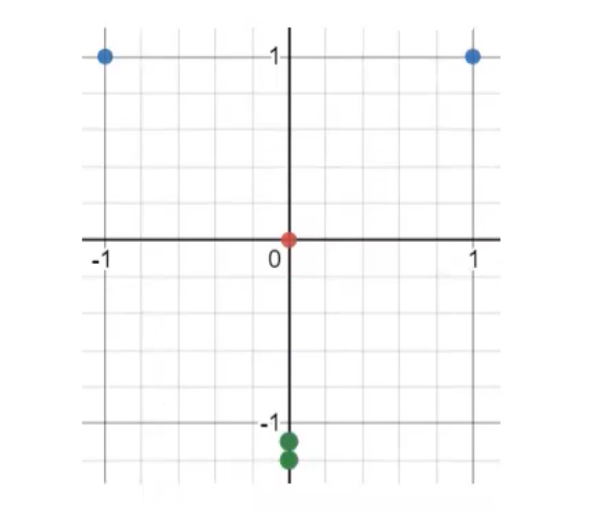

__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [57]:
K_means_model1 = KMeans(n_clusters=4, random_state=42,)
K_means_model1.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [58]:
X1["Classes"] = K_means_model1.labels_  
X1.sample(5)

,Age,Spending_score,Classes
141,32,93,2
198,32,18,1
21,25,73,2
137,32,73,2
64,63,51,0


#### *iv. Visualizing and Labeling All the Clusters*

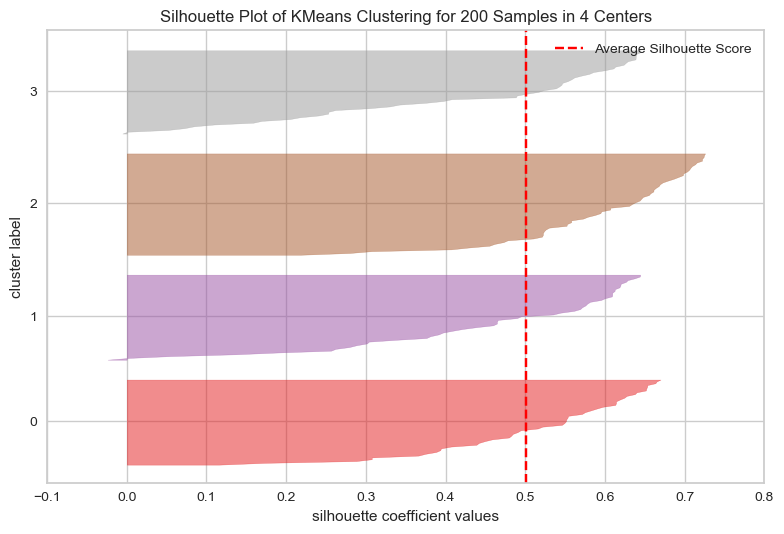

In [59]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)  
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X1)    
visualizer.poof();

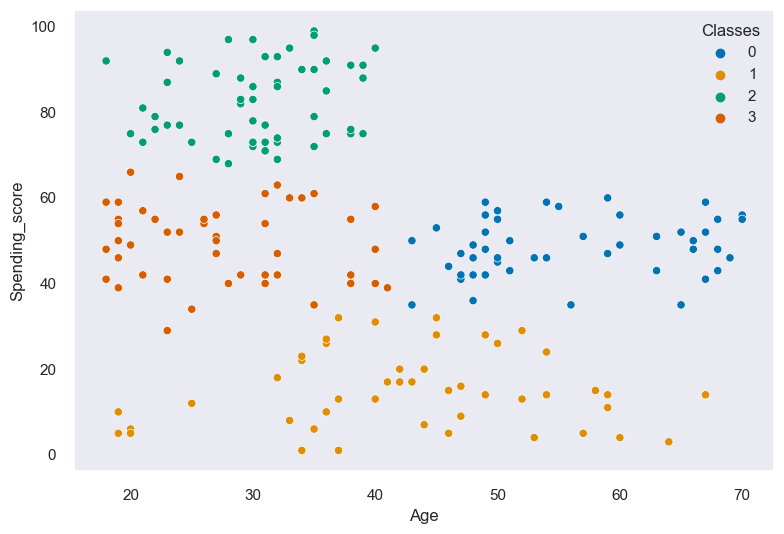

In [60]:
sns.set(style = "dark")
sns.scatterplot(x=X1["Age"], y=X1["Spending_score"], hue = X1.Classes, palette = "colorblind");

### Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

In [61]:
X2 = df[["Income","Spending_score"]]
X2.head(2)

,Income,Spending_score
0,15,39
1,15,81


In [62]:
hopkins(X2, X2.shape[0])

0.2901072264263224

#### *ii. Determine optimal number of clusters*

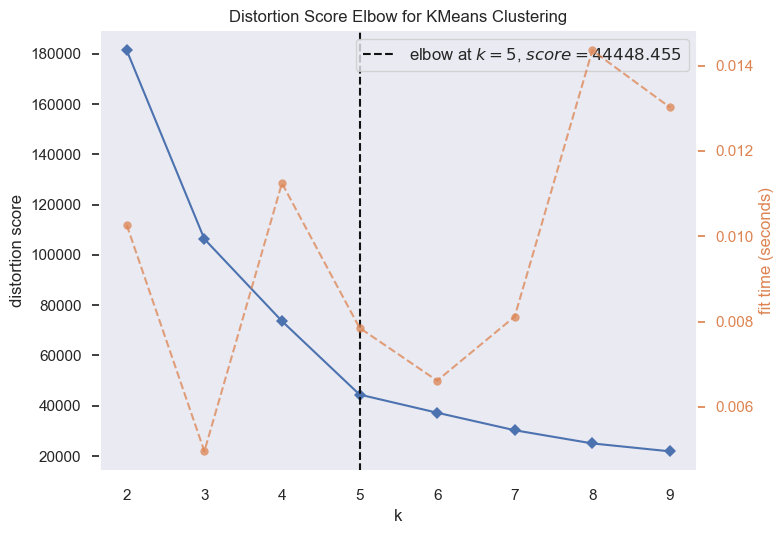

In [63]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X2)        
visualizer.show();

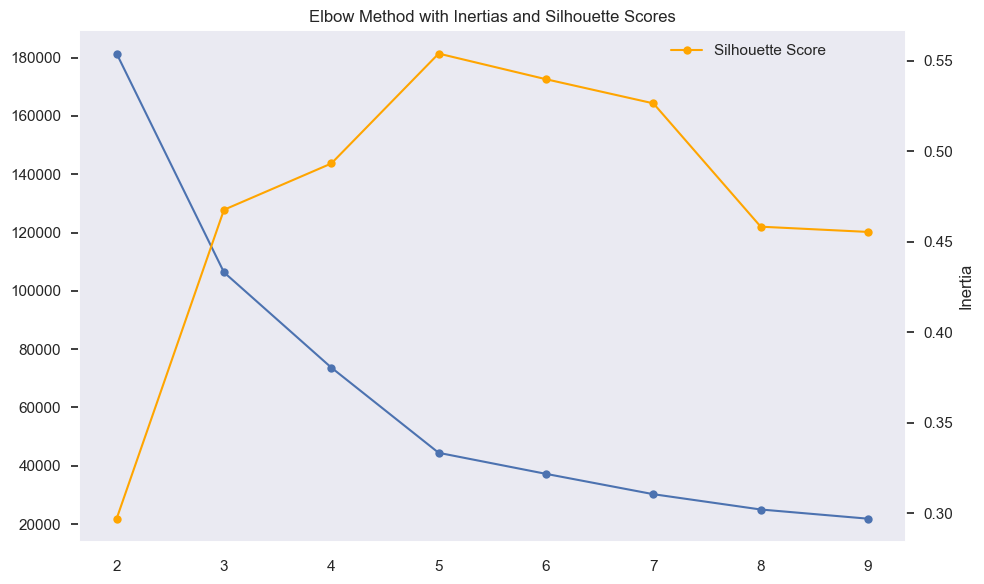

In [64]:
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X2)
    silhouette = silhouette_score(X2, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

5 is optimum cluster number.

#### *iii. Apply K Means*

In [65]:
K_means_model2 = KMeans(n_clusters=5, random_state=42,)
K_means_model2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [66]:
X2["Classes"] = K_means_model2.labels_  
X2.head()

,Income,Spending_score,Classes
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


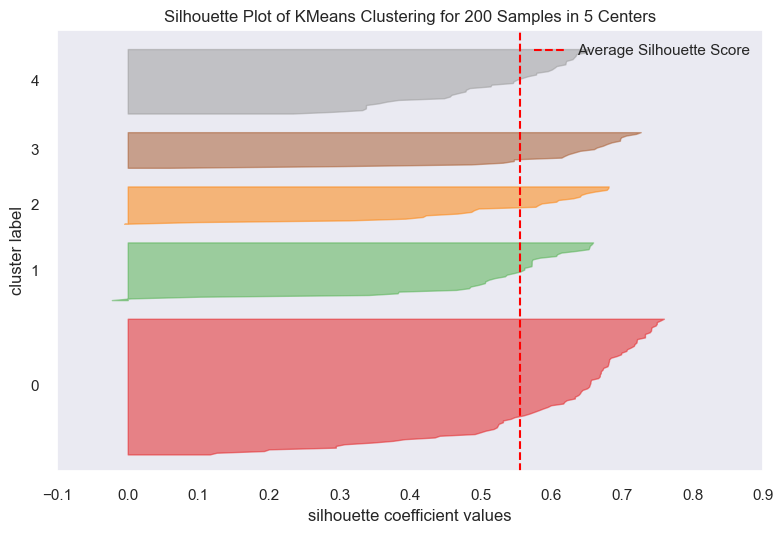

In [67]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)  
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X2)    
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

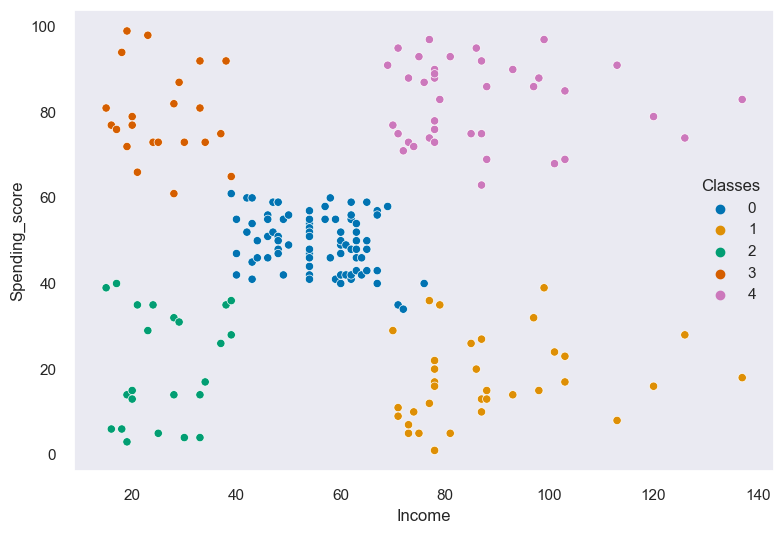

In [68]:
sns.scatterplot(x=X2["Income"], y=X2["Spending_score"], hue = X2.Classes, palette = "colorblind");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
hc_ward = linkage (y= X, method ="ward") 
hc_complete = linkage (X, "complete") 
hc_average = linkage (X, "average") 
hc_single= linkage(X ,"single")

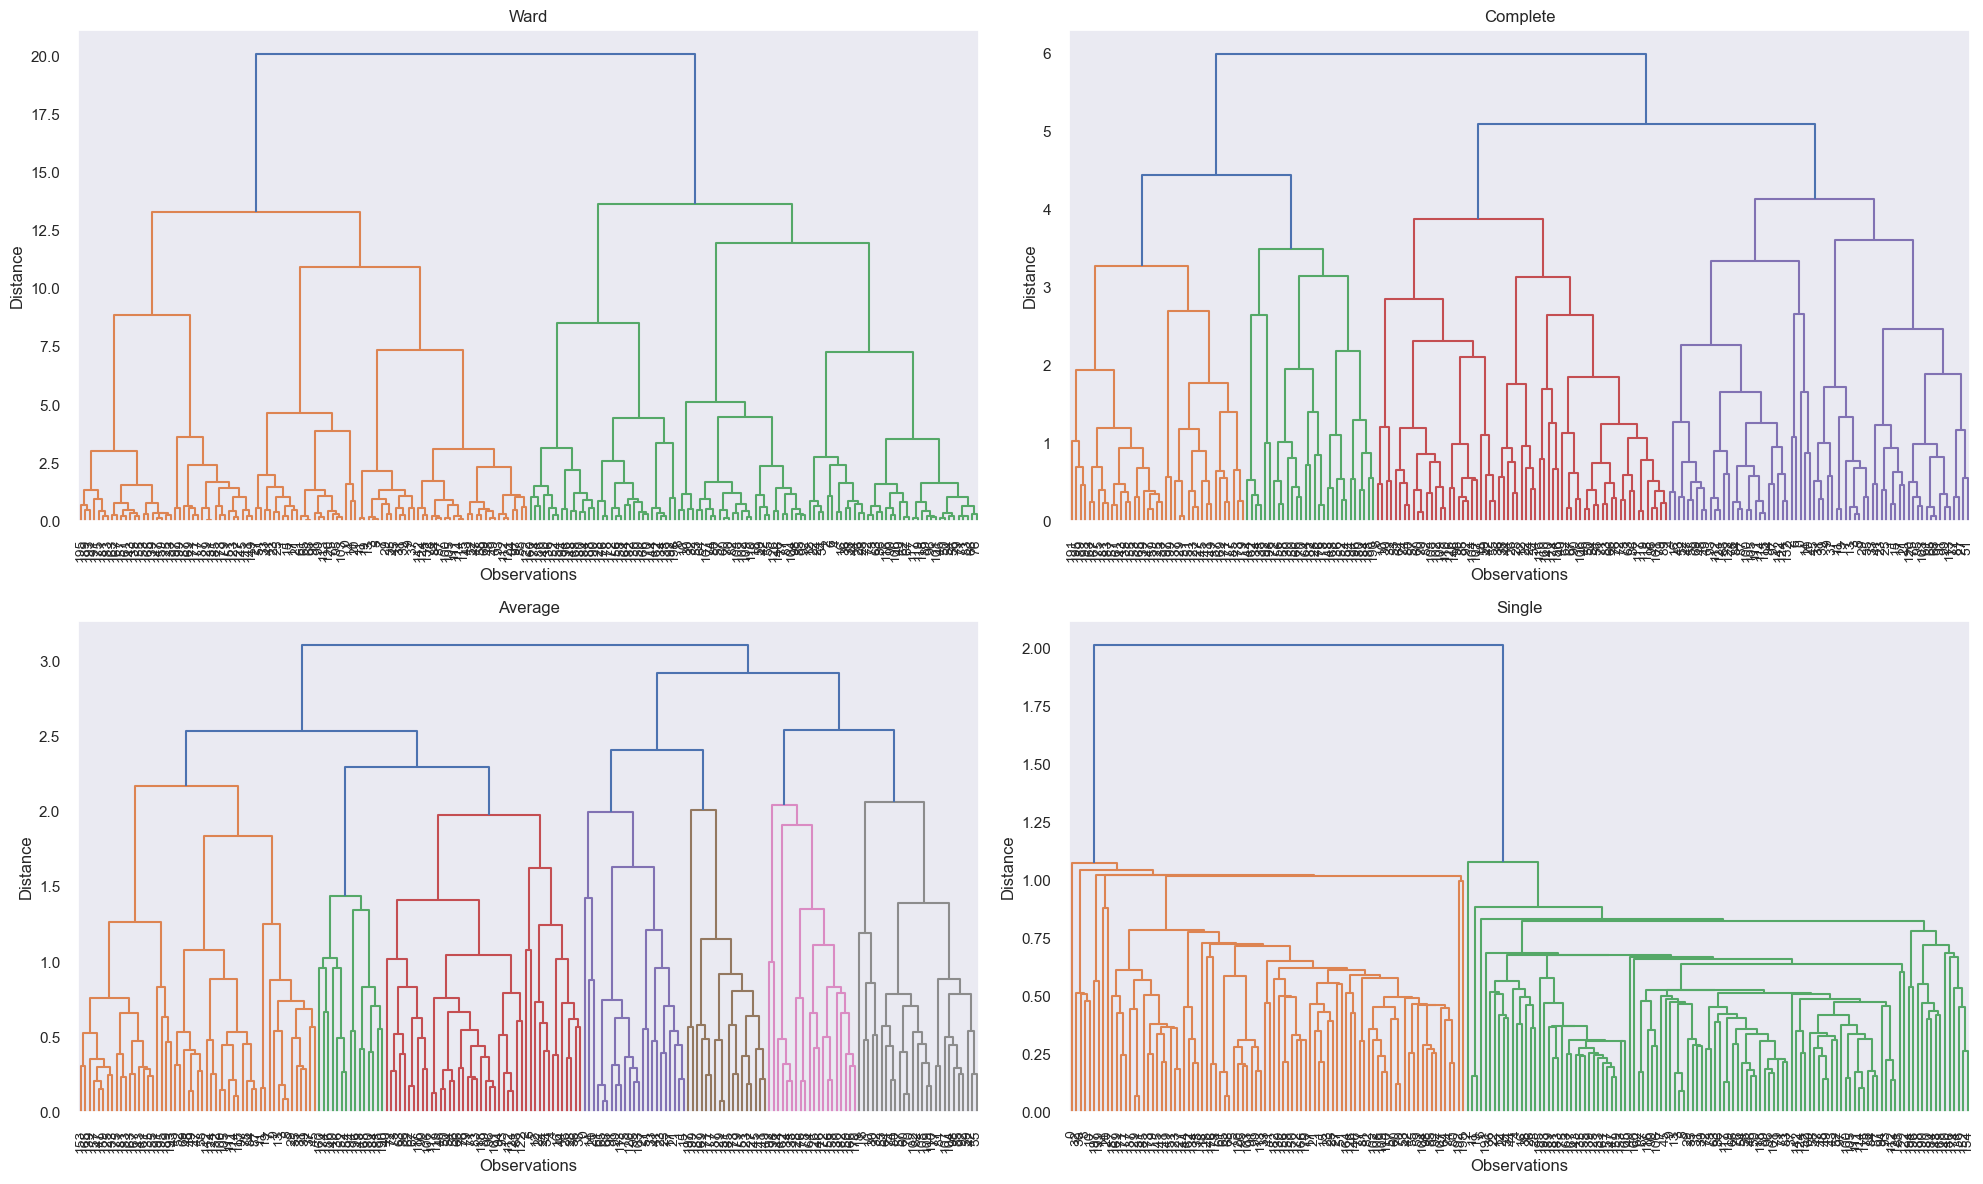

In [71]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

2, 4, 7 and 2 are optimum n_clusters, respectively.

### Clustering based on Age and Spending Score- X1

In [72]:
hc_ward = linkage (y= X1, method ="ward") 
hc_complete = linkage (X1, "complete") 
hc_average = linkage (X1, "average") 
hc_single= linkage(X1 ,"single")

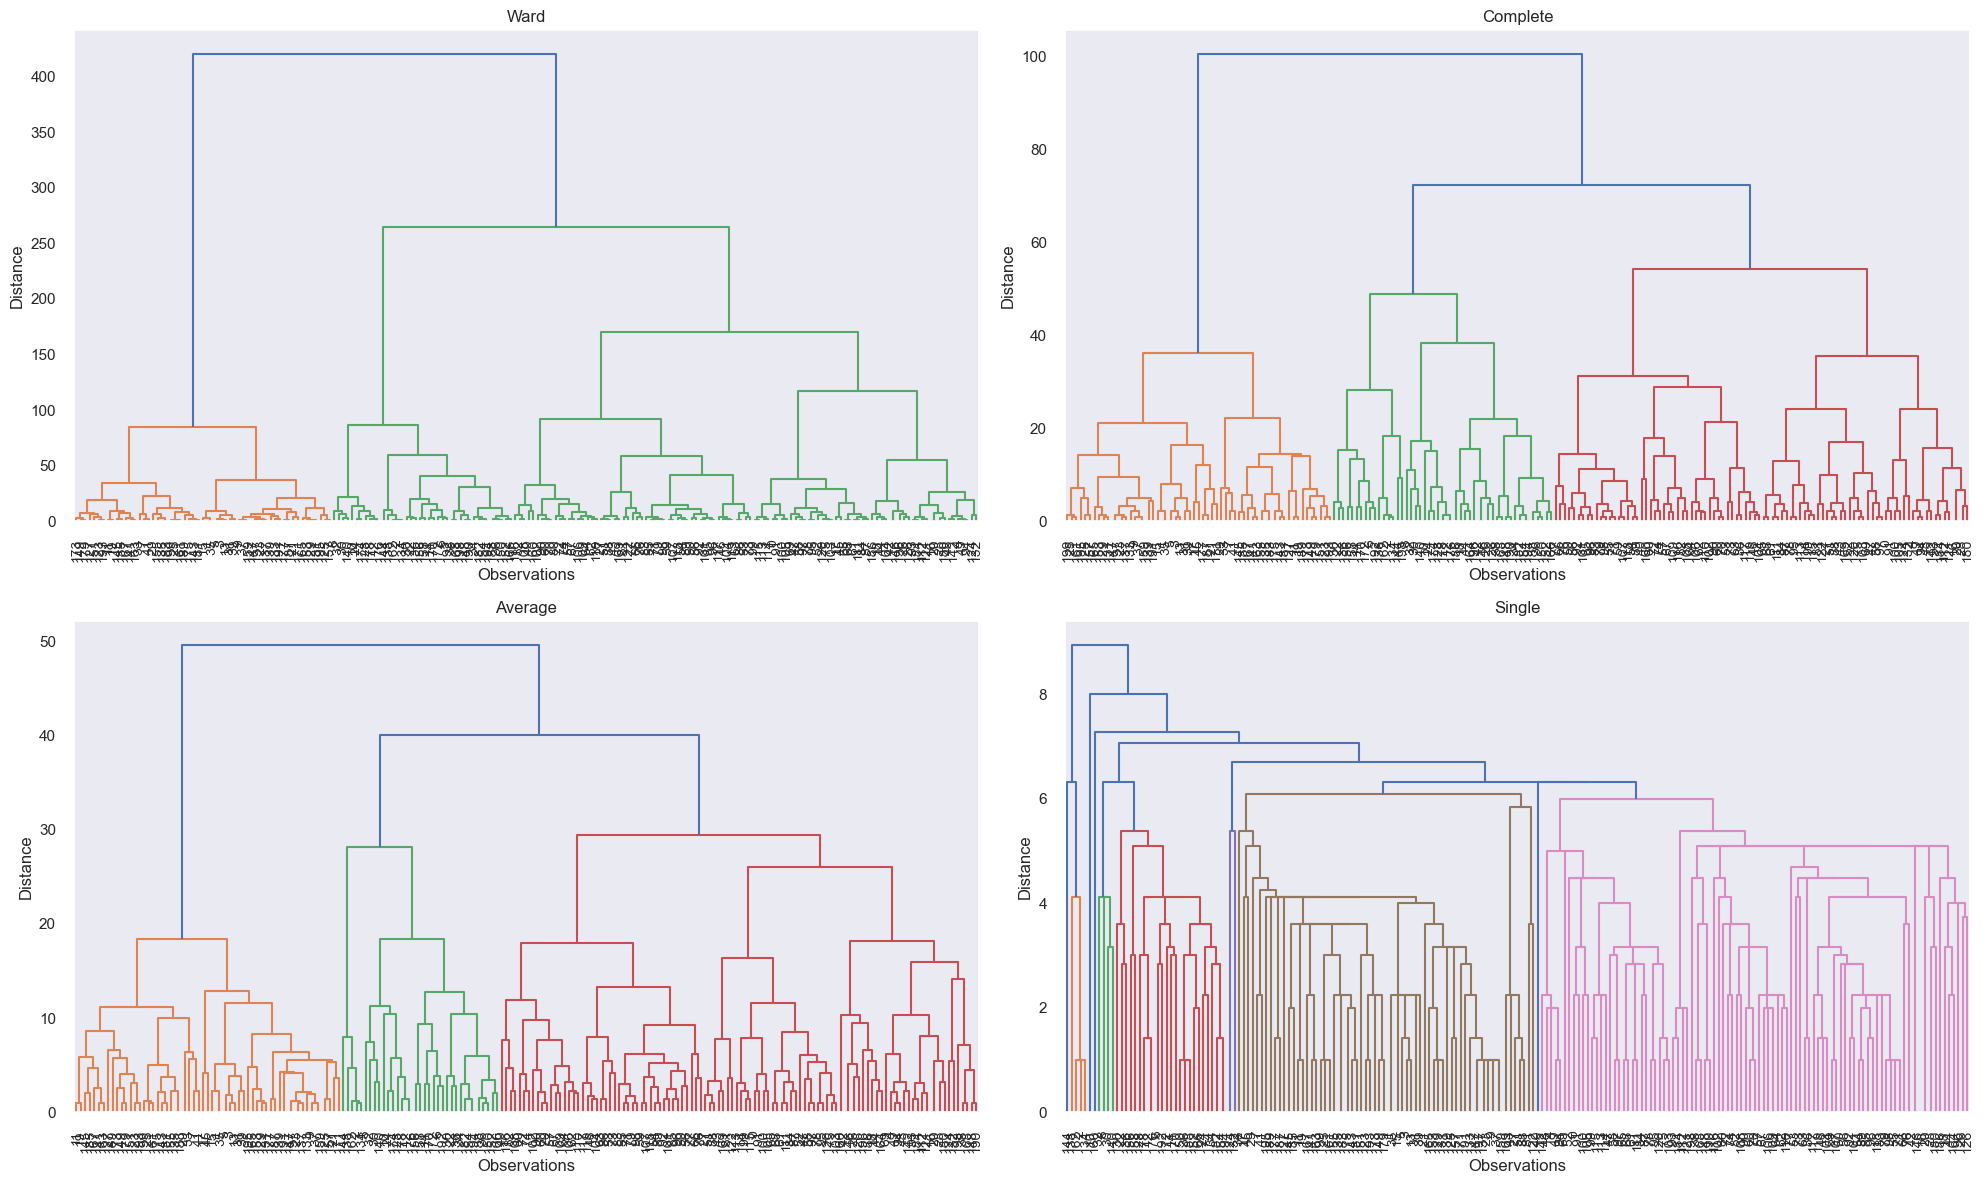

In [73]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

2, 3, 3 are optimum n_clusters, respectively.

## Clustering based on Annual Income and Spending Score- X2

In [74]:
hc_ward = linkage (y= X2, method ="ward") 
hc_complete = linkage (X2, "complete") 
hc_average = linkage (X2, "average") 
hc_single= linkage(X2 ,"single")

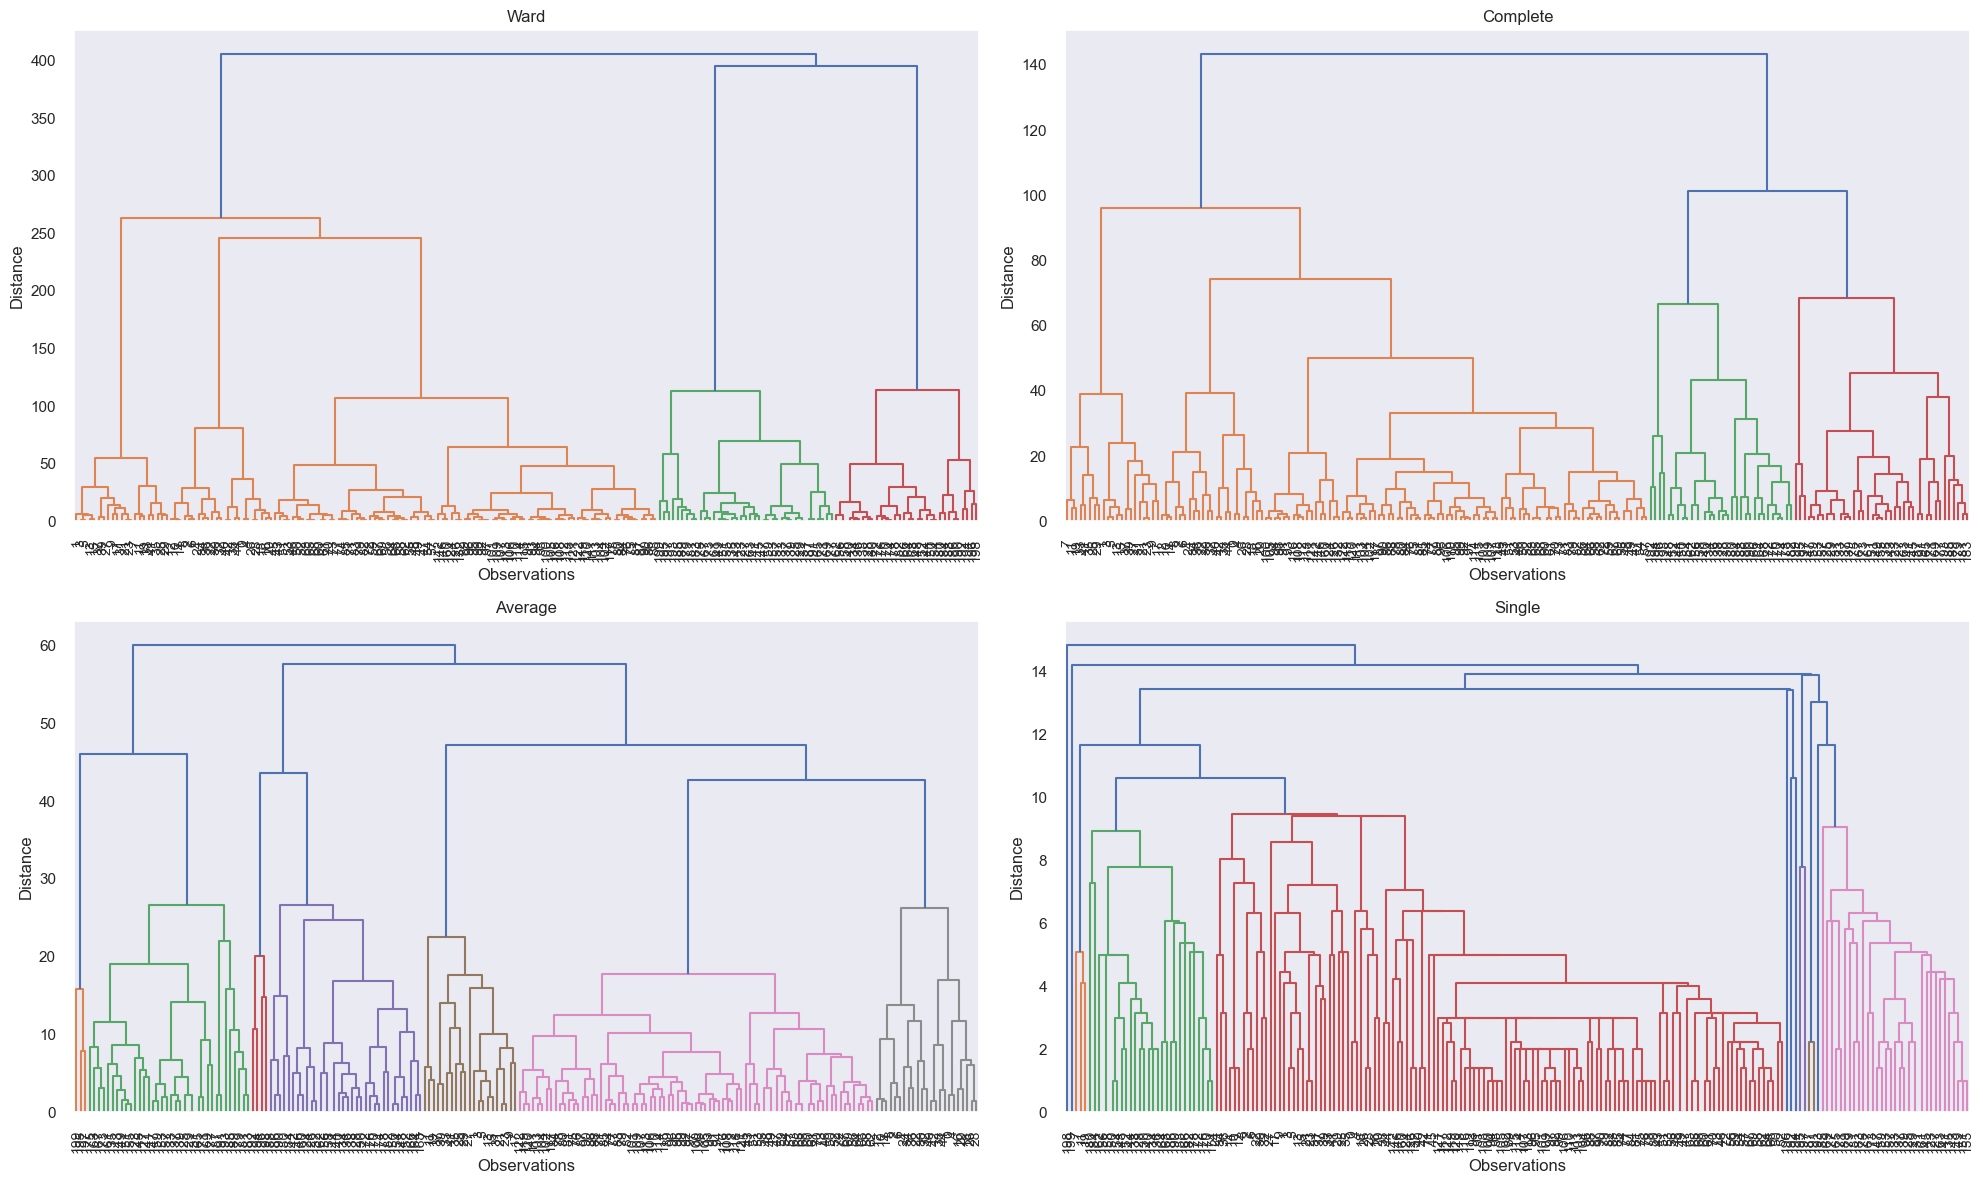

In [75]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

3 is opt. n_cluster

### ii. *Apply Agglomerative Clustering*

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
AC_model =  AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "complete") 
AC_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

#### Age and Spending Score- X1

In [78]:
AC_model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "complete") 
AC_model1.fit_predict(X1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### Annual Income and Spending Score- X2

In [79]:
AC_model2 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") 
AC_model2.fit_predict(X2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [80]:
AC_model2_2 =  AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage = "ward") 
AC_model2_2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### iii. *Visualizing and Labeling All the Clusters* 

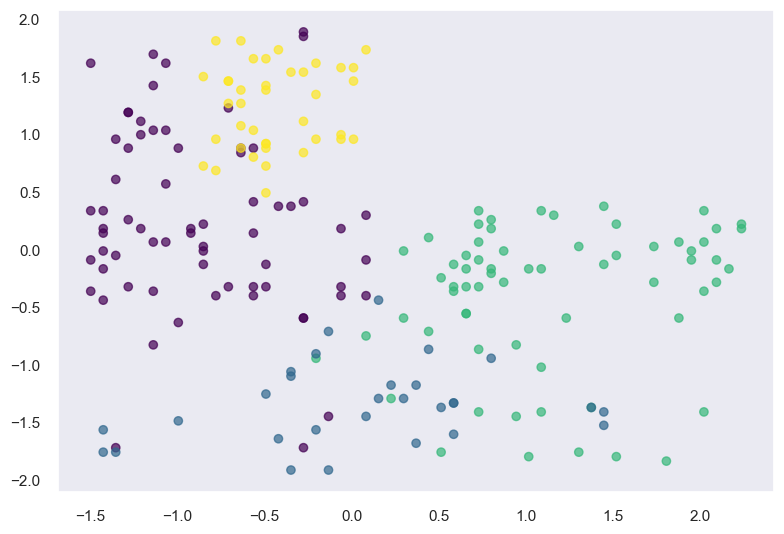

In [81]:
plt.scatter(X["Age"], X["Spending_score"], c= AC_model.labels_, cmap= "viridis", alpha = 0.7);

These clusters are not good.

#### Age and Spending Score- X1

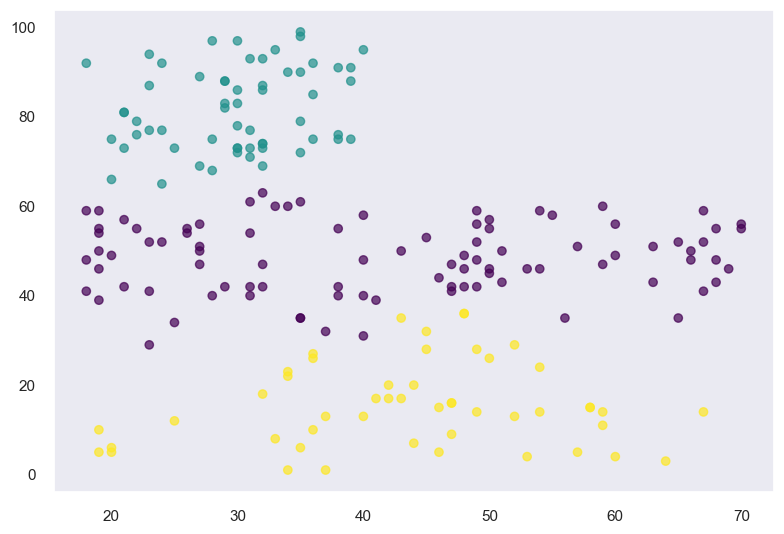

In [82]:
plt.scatter(X1["Age"], X1["Spending_score"], c= AC_model1.labels_, cmap= "viridis", alpha = 0.7);

#### Annual Income and Spending Score- X2

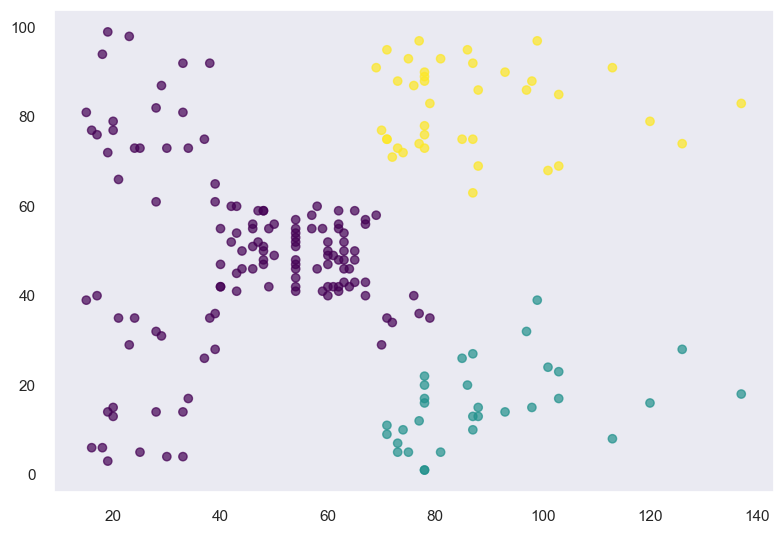

In [83]:
plt.scatter(X2["Income"], X2["Spending_score"], c= AC_model2.labels_, cmap= "viridis", alpha = 0.7);

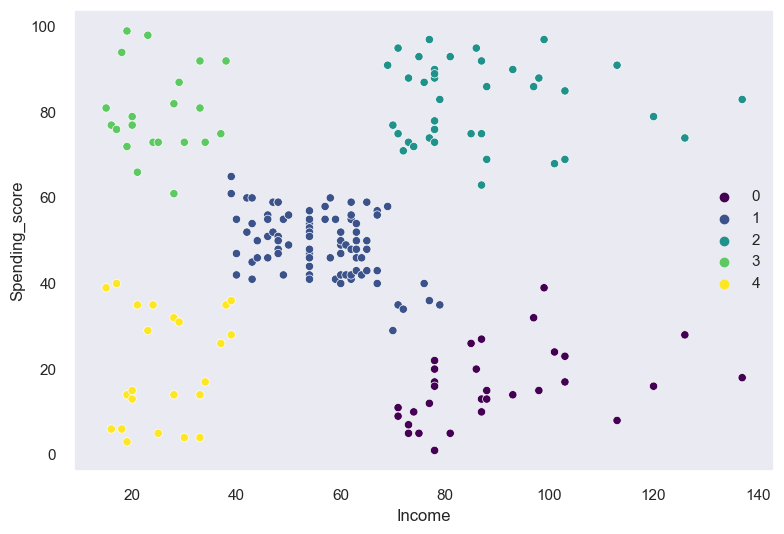

In [84]:
sns.scatterplot(x=X2["Income"], y=X2["Spending_score"], hue= AC_model2_2.labels_, palette= "viridis");

0 = People in the high income group who spend less.

1 = People in the middle income group who spend moderately.

2 = People in the high income group who spend too much.

3 = People in the low income group who spend too much.

4 = People in the low income group who spend less.

#### Interpretation based on Age and Spending Score- X1

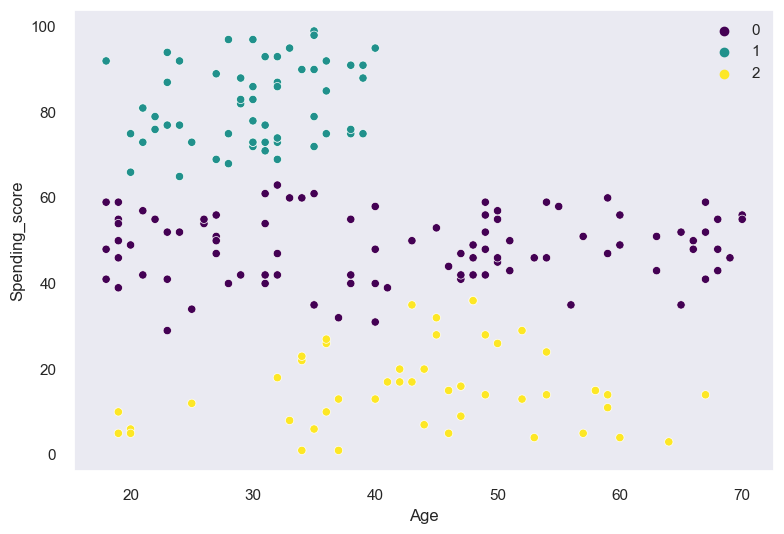

In [85]:
sns.scatterplot(x=df["Age"], y=df["Spending_score"], hue=AC_model1.labels_, palette="viridis");

Those with high Spending scores are under the age of 40, and those with low and medium spenders have a wide age distribution.

In [86]:
X1["Classes"]=AC_model1.labels_
X1.head()

,Age,Spending_score,Classes
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


In [87]:
mapping = {2: 'low', 0: 'medium', 1: 'high'}
X1["Classes"]=X1["Classes"].map(mapping)
X1.head()

,Age,Spending_score,Classes
0,19,39,medium
1,21,81,high
2,20,6,low
3,23,77,high
4,31,40,medium


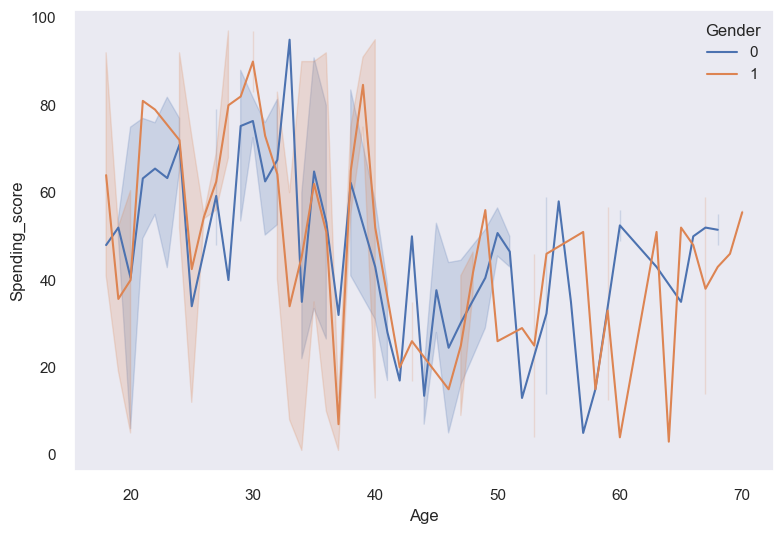

In [88]:
sns.lineplot(x=df["Age"], y=df["Spending_score"], hue=df.Gender);

### Conclusion

According to age there are three groups (low,medium,high). Those with high Spending scores are under the age of 40, and those with low and medium spenders have a wide age distribution.

## Conclusion

According to income there are five groups: 

0 = People in the high income group who spend less.

1 = People in the middle income group who spend moderately.

2 = People in the high income group who spend too much.

3 = People in the low income group who spend too much.

4 = People in the low income group who spend less.

# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>B168 Unsupervised Project </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |